<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import pandas as pd
import os
import tensorflow as tf
tf.keras.backend.clear_session()

BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py
%run -i ..\..\utility\modeling\ann_models.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load detection_pipe
Load tensorflow models


In [6]:
path_r = './../../dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl'
path_p = 'dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl'
tt_split(path_r)
table = pd.read_pickle(path_r)

./../../dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done


In [7]:
task = {'path_descr':path_r, 
        'feat':{'function':'frame', 'frames':5}, 
        'feat_col':'MEL_raw', 
        'SNR':'6dB', 
        'machine':'pump', 
        'ID':'00',
        'BASE_FOLDER':BASE_FOLDER}

df_train, data_train = load_data(**task, train_set=1)
df_test, data_test = load_data(**task, train_set=0)

In [8]:
model_base = uni_AutoEncoder()

In [9]:
model_base.fit(data_train)

Epoch 1/50
521/521 [==============================] - 16s 30ms/step - loss: 59.3288
Epoch 2/50
521/521 [==============================] - 12s 23ms/step - loss: 26.1150
Epoch 3/50
521/521 [==============================] - 12s 23ms/step - loss: 22.7190
Epoch 4/50
521/521 [==============================] - 12s 23ms/step - loss: 21.3172
Epoch 5/50
521/521 [==============================] - 13s 24ms/step - loss: 21.4368
Epoch 6/50
521/521 [==============================] - 12s 23ms/step - loss: 21.2725
Epoch 7/50
521/521 [==============================] - 12s 23ms/step - loss: 19.3801
Epoch 8/50
521/521 [==============================] - 12s 23ms/step - loss: 19.0409
Epoch 9/50
521/521 [==============================] - 12s 22ms/step - loss: 19.1073
Epoch 10/50
521/521 [==============================] - 12s 23ms/step - loss: 19.2611
Epoch 11/50
521/521 [==============================] - 12s 23ms/step - loss: 19.1304
Epoch 12/50
521/521 [==============================] - 12s 23ms/step - los

In [10]:
y_pred = model_base.predict(data_test)

In [11]:
error = np.square(data_test - y_pred)

In [12]:
error.shape

(88374, 400)

In [13]:
uncertain = np.mean(error, axis=1)
uncertain.shape

(88374,)

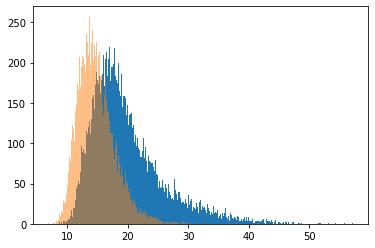

In [23]:
plt.hist(uncertain[df_test.abnormal==1], bins=1000);
plt.hist(uncertain[df_test.abnormal==0], bins=1000, alpha=.5);

In [15]:
y_true = df_test.abnormal

In [16]:
y_true

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
88369    0.0
88370    0.0
88371    0.0
88372    0.0
88373    0.0
Name: abnormal, Length: 88374, dtype: float64

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, uncertain)

0.7859273432572789